In [1]:
zip_path = '/content/drive/My\ Drive/BCML/datasets/DeepLearning/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

# **Base Model**

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [3]:
dataset_dir = '/content/'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [4]:
history=model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 47s 466ms/step - loss: 0.8080 - accuracy: 0.5449 - val_loss: 0.6788 - val_accuracy: 0.5524
Epoch 2/75
100/100 [==============================] - 46s 462ms/step - loss: 0.6677 - accuracy: 0.5924 - val_loss: 0.6499 - val_accuracy: 0.6190
Epoch 3/75
100/100 [==============================] - 47s 469ms/step - loss: 0.6457 - accuracy: 0.6181 - val_loss: 0.6370 - val_accuracy: 0.6212
Epoch 4/75
100/100 [==============================] - 47s 466ms/step - loss: 0.6324 - accuracy: 0.6336 - val_loss: 0.6700 - val_accuracy: 0.5884
Epoch 5/75
100/100 [==============================] - 46s 463ms/step - loss: 0.6286 - accuracy: 0.6393 - val_loss: 0.6220 - val_accuracy: 0.6430
Epoch 6/75
100/100 [==============================] - 46s 461ms/step - loss: 0.6222 - accuracy: 0.6453 - val_loss: 0.6371 - val_accuracy: 0.6070
Epoch 7/75
100/100 [==============================] - 46s 459ms/step - loss: 0.6158 - accuracy: 0.6524 - val_loss: 0.6299 - val_ac

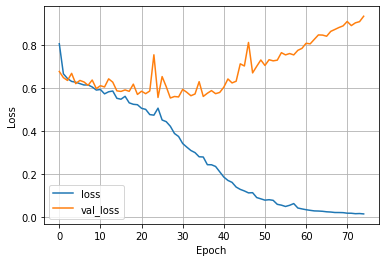

In [6]:
plot_loss(history)

Kesimpulan ada pada file Assignment15_RickyGunawan_imageaug_filteradd